# Topic: Customer Segmentation
# Author: Subhashini Natarajan

In [2]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load and inspect orders data
order_df =pd.read_csv("/Users/manikantanvenkataraman/Desktop/Data Science -College/Data Science/DSC 630/Project/archive-2/Required files/olist_orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
#Load and inspect customer data
customer_df = pd.read_csv("/Users/manikantanvenkataraman/Desktop/Data Science -College/Data Science/DSC 630/Project/archive-2/Required files/olist_customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
#Load and inspect customer data
order_review_df = pd.read_csv("/Users/manikantanvenkataraman/Desktop/Data Science -College/Data Science/DSC 630/Project/archive-2/Required files/olist_order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
#Load and inspect product data

product_df = pd.read_csv("/Users/manikantanvenkataraman/Desktop/Data Science -College/Data Science/DSC 630/Project/archive-2/Required files/olist_products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# Load and inspect order items data

order_items_df = pd.read_csv("/Users/manikantanvenkataraman/Desktop/Data Science -College/Data Science/DSC 630/Project/archive-2/Required files/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
# Merge customer and order data based on customer id

olist_df1 = pd.merge(
    customer_df,
    order_df,
    how="inner",
    on= ["customer_id"]
)

olist_df1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [11]:
# Merge order review data with the above based on order id
olist_df2 = pd.merge(
    olist_df1,
    order_review_df,
    how="inner",
    on= ["order_id"]
)

olist_df2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [12]:
# Merge order items data based on order id
olist_df3=pd.merge(
    olist_df2,
    order_items_df,
    how="inner",
    on= ["order_id"]
)

olist_df3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [15]:
# Merge product data based on product id 

olist_df4 = pd.merge(
    olist_df3,
    product_df,
    how="inner",
    on= ["product_id"]
)

olist_df4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [16]:
# Create a final dataframe with only the required attributes

olist_df = olist_df4[['customer_id','customer_unique_id', 'order_id', 'product_id','review_id', 'order_purchase_timestamp', 'customer_city','customer_state' ,'product_category_name','review_score', 'order_item_id', 'review_creation_date', 'price', 'freight_value']]
olist_df.head()

,customer_id,customer_unique_id,order_id,product_id,review_id,order_purchase_timestamp,customer_city,customer_state,product_category_name,review_score,order_item_id,review_creation_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,88b8b52d46df026a9d1ad2136a59b30b,2017-05-16 15:05:35,franca,SP,moveis_escritorio,4,1,2017-05-26 00:00:00,124.99,21.88
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,7fc63200f12eebb5f387856afdd63db8,2017-11-09 00:50:13,santarem,PA,moveis_escritorio,1,1,2017-11-29 00:00:00,112.99,24.90
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,7fc63200f12eebb5f387856afdd63db8,2017-11-09 00:50:13,santarem,PA,moveis_escritorio,1,2,2017-11-29 00:00:00,112.99,24.90
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,251191809e37c1cffc16865947c18a4d,2017-05-07 20:11:26,nova santa rita,RS,moveis_escritorio,3,1,2017-05-27 00:00:00,124.99,15.62
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,f7123bac5b91a0e2e38d8b41fd1206f4,2018-02-03 19:45:40,mage,RJ,moveis_escritorio,4,1,2018-03-01 00:00:00,106.99,30.59


In [153]:
#Check the number of records

len(olist_df.customer_unique_id.unique())

94721

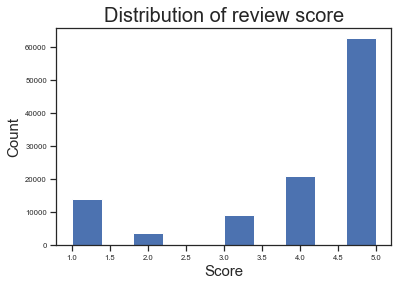

In [154]:
# Obtain the distribution of review score

olist_df=olist_df.dropna()
plt.hist(olist_df.review_score)
plt.xlabel("Score", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Distribution of review score", fontsize=20)
plt.show()

The above distribution shows that number of records with higher ratings are quite high.

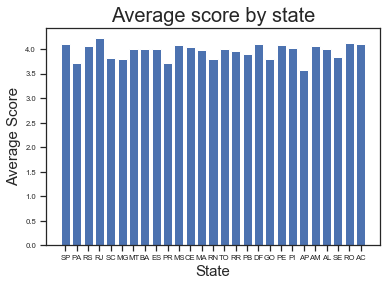

In [124]:
# Obtain distribution of review score by state

x = olist_df.customer_state.unique()
y = olist_df.groupby("customer_state")['review_score'].mean()

plt.bar(x,y)
plt.ylabel("Average Score", fontsize=15)
plt.xlabel("State", fontsize=15)
plt.title("Average score by state", fontsize=20)

plt.show()

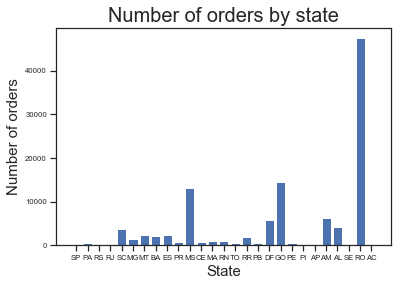

In [125]:
# Obtain count of orders by state

x1 = olist_df.customer_state.unique()
y1 = olist_df.groupby("customer_state")['customer_unique_id'].count()

plt.bar(x1,y1)
plt.xlabel("State", fontsize=15)
plt.ylabel("Number of orders", fontsize=15)
plt.title("Number of orders by state", fontsize=20)
plt.show()

In [155]:
# Obtain data type info for every field
olist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110774 entries, 0 to 112371
Data columns (total 14 columns):
customer_id                 110774 non-null object
customer_unique_id          110774 non-null object
order_id                    110774 non-null object
product_id                  110774 non-null object
review_id                   110774 non-null object
order_purchase_timestamp    110774 non-null object
customer_city               110774 non-null object
customer_state              110774 non-null object
product_category_name       110774 non-null object
review_score                110774 non-null int64
order_item_id               110774 non-null int64
review_creation_date        110774 non-null object
price                       110774 non-null float64
freight_value               110774 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.7+ MB


In [180]:
# Change the data type of order purchase timestamp from object to datatime

olist_df['order_purchase_timestamp']=pd.to_datetime(olist_df['order_purchase_timestamp'])

olist_df.sort_values(by=['order_purchase_timestamp'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [181]:
# Obtain the number of orders by year month 

order_by_month = olist_df[['order_purchase_timestamp']].groupby(olist_df['order_purchase_timestamp'].dt.to_period('M')).agg({'order_purchase_timestamp':'count'})
order_by_month.head()
order_by_month = order_by_month.rename(columns = {'order_purchase_timestamp': 'num_of_orders'})
order_by_month = order_by_month.reset_index()
order_by_month['month_year'] = order_by_month['order_purchase_timestamp'].dt.strftime('%Y-%b')



,order_purchase_timestamp,num_of_orders,month_year
0,2016-09,6,2016-Sep
1,2016-10,361,2016-Oct
2,2016-12,1,2016-Dec
3,2017-01,955,2017-Jan
4,2017-02,1951,2017-Feb


In [188]:
order_by_month.head(40)
order_by_month = order_by_month[order_by_month['month_year']!='2018-Sep']

An outlier observed for sep-2018, which was removed. 

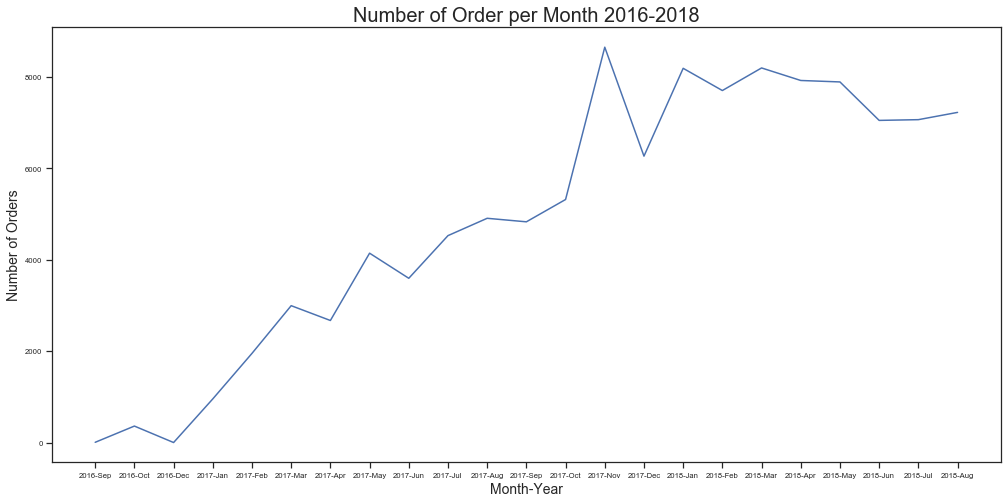

In [190]:
# Plot the trend of orders


plt.figure(figsize=(17,8))

sns.set_theme(style="ticks", font_scale=0.7)

order_by_month_trend=sns.lineplot(x = 'month_year', y = 'num_of_orders', data = order_by_month)

order_by_month_trend.set_title('Number of Order per Month 2016-2018',fontsize = 20)

order_by_month_trend.set_xlabel('Month-Year',fontsize = 14)

order_by_month_trend.set_ylabel('Number of Orders',fontsize = 14)

plt.show()

The number of orders from the plot above can be seen with steady increase apart from few occasional dips and the latest data at the end of 2018 is well above 70000 orders.

In [194]:
# Obtain the average review score by year month

reviewscore_by_month = olist_df[['review_score']].groupby(olist_df['order_purchase_timestamp'].dt.to_period('M')).agg({'review_score':'mean'})
reviewscore_by_month.head()
reviewscore_by_month = reviewscore_by_month.rename(columns = {'review_score': 'avg_review_score'})
reviewscore_by_month = reviewscore_by_month.reset_index()
reviewscore_by_month['month_year'] = reviewscore_by_month['order_purchase_timestamp'].dt.strftime('%b-%Y')
reviewscore_by_month = reviewscore_by_month[reviewscore_by_month['month_year']!='Sep-2018']
reviewscore_by_month.head(40)

,order_purchase_timestamp,avg_review_score,month_year
0,2016-09,1.000000,Sep-2016
1,2016-10,3.612188,Oct-2016
2,2016-12,5.000000,Dec-2016
3,2017-01,4.069110,Jan-2017
4,2017-02,4.054331,Feb-2017
5,2017-03,4.059118,Mar-2017
6,2017-04,4.004494,Apr-2017
7,2017-05,4.136649,May-2017
8,2017-06,4.133593,Jun-2017
9,2017-07,4.139196,Jul-2017


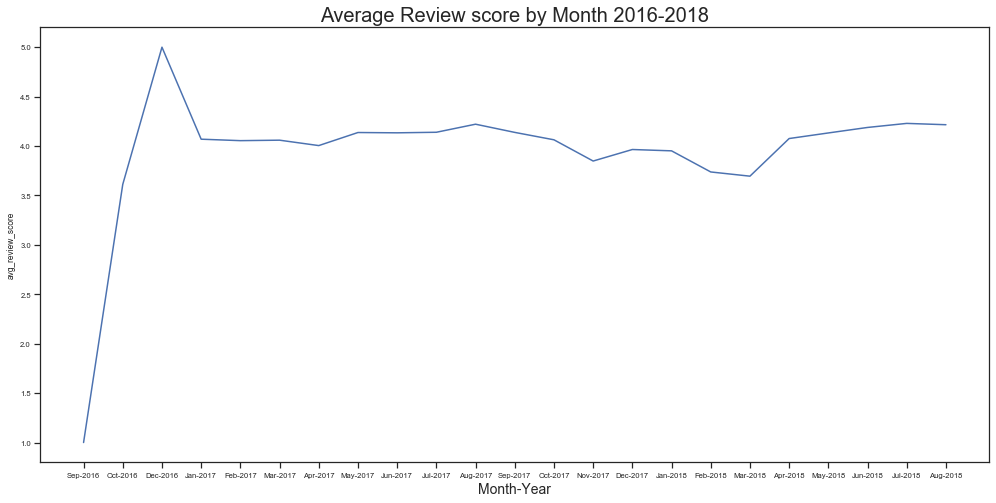

In [195]:
# Plot the average review score by year month

plt.figure(figsize=(17,8))
sns.set_theme(style="ticks", font_scale=0.7)
reviewscore_by_month=sns.lineplot(x = 'month_year', y = 'avg_review_score', data = reviewscore_by_month)
reviewscore_by_month.set_title('Average Review score by Month 2016-2018',fontsize = 20)
reviewscore_by_month.set_xlabel('Month-Year',fontsize = 14)
order_by_month_trend.set_ylabel('Average Review Score',fontsize = 14)
plt.show()

The average review score for the products from the plot above can be seen as pretty constant and above 4, except for a brief dip between Jan 2018 - April 2018.

In [103]:
# Obtain the number of orders placed by every customer
num_of_orders = olist_df[['order_id']].groupby(olist_df['customer_unique_id']).agg({'order_id':'count'})                                    
num_of_orders = num_of_orders.rename(columns = {'order_id': 'order_count'})
num_of_orders = num_of_orders.reset_index()
num_of_orders.order_count.unique()

array([ 1,  2,  4,  3,  7,  5,  6, 12, 10,  8, 18, 15,  9, 14, 21, 11, 13,
       20, 24])

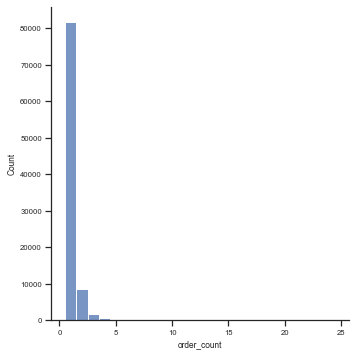

In [104]:
# Obtain distribution of number of orders by a customer

sns.displot(num_of_orders, x="order_count",discrete=True)

The number of one time orders is the highest, followed by twice and thrice.

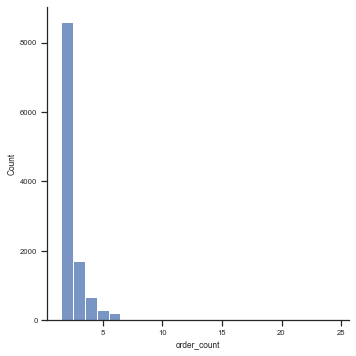

In [99]:
# Obtain number of multiple orders by the customer and plot the distribution

multiple_orders = num_of_orders[num_of_orders.order_count>1]
sns.displot(multiple_orders, x="order_count",discrete=True)

Number of three orders and more, by the same customer is lesser than 20,000.

In [32]:
# Create features data frame with the required features

features = olist_df[[ 'customer_unique_id', 'customer_state','review_score','price', 'freight_value']]
features = pd.merge(features,num_of_orders, how='inner', on=['customer_unique_id'])
features.head()

,customer_unique_id,customer_state,review_score,price,freight_value,order_count
0,861eff4711a542e4b93843c6dd7febb0,SP,4,124.99,21.88,1
1,9eae34bbd3a474ec5d07949ca7de67c0,PA,1,112.99,24.90,2
2,9eae34bbd3a474ec5d07949ca7de67c0,PA,1,112.99,24.90,2
3,3c799d181c34d51f6d44bbbc563024db,RS,3,124.99,15.62,1
4,23397e992b09769faf5e66f9e171a241,RJ,4,106.99,30.59,1


In [39]:
# Convert categorical data into numeric using get dummies
# Prepare the final data set for standardization

features = pd.get_dummies(features, columns=['customer_state'])
features.drop(['customer_unique_id'], axis=1, inplace=True)
features.head()

,review_score,price,freight_value,order_count,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
0,4,124.99,21.88,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,112.99,24.90,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,112.99,24.90,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,124.99,15.62,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,106.99,30.59,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
# Import required libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [40]:
# standardize features

scaler = StandardScaler()
x_std=scaler.fit_transform(features)
x_std[:31]

array([[-2.33978276e-02,  2.53142885e-02,  1.20537730e-01,
        -3.81543595e-01, -2.86248165e-02, -6.30539900e-02,
        -3.82305031e-02, -2.68577752e-02, -1.86214394e-01,
        -1.15209458e-01, -1.48230986e-01, -1.42518195e-01,
        -1.45064924e-01, -8.58948404e-02, -3.63420846e-01,
        -8.62096943e-02, -9.69788409e-02, -9.79095090e-02,
        -7.30211802e-02, -1.27444978e-01, -6.93592213e-02,
        -2.31927715e-01, -3.84418281e-01, -6.86431209e-02,
        -4.97103435e-02, -2.15165741e-02, -2.42990066e-01,
        -1.95971100e-01, -5.84805844e-02,  1.17079773e+00,
        -5.29350577e-02],
       [-2.18502623e+00, -4.05649110e-02,  3.11902841e-01,
         3.26475707e-01, -2.86248165e-02, -6.30539900e-02,
        -3.82305031e-02, -2.68577752e-02, -1.86214394e-01,
        -1.15209458e-01, -1.48230986e-01, -1.42518195e-01,
        -1.45064924e-01, -8.58948404e-02, -3.63420846e-01,
        -8.62096943e-02, -9.69788409e-02,  1.02135126e+01,
        -7.30211802e-02, -1.27

In [66]:
# Select the required features for clustering

features_2 = olist_df[[ 'customer_unique_id','review_score','price', 'freight_value']]
features_2 = pd.merge(features_2,num_of_orders, how='inner', on=['customer_unique_id'])
features_2['Total_Price']=features_2['price']+features_2['freight_value']
features_2.drop_duplicates(inplace=True)
features_2.drop(['price', 'freight_value', 'customer_unique_id'], axis=1, inplace=True)
features_2.head()

,review_score,order_count,Total_Price
0,4,1,146.87
1,1,2,137.89
3,3,1,140.61
4,4,1,137.58
5,4,1,142.05


In [202]:
# standardize features

scaler = StandardScaler()
x_std=scaler.fit_transform(features_2)
x_std[:5]

array([[-0.05828092, -0.32817037,  0.01021205],
       [-2.27863428,  0.775535  , -0.03577934],
       [-0.79839871, -0.32817037, -0.02184876],
       [-0.05828092, -0.32817037, -0.03736702],
       [-0.05828092, -0.32817037, -0.01447375]])

In [205]:
# Determine SSE

sse=[]
for k in range(1,6):
    model=KMeans(n_clusters=k)
    model.fit(x_std)
    sse.append(model.inertia_)

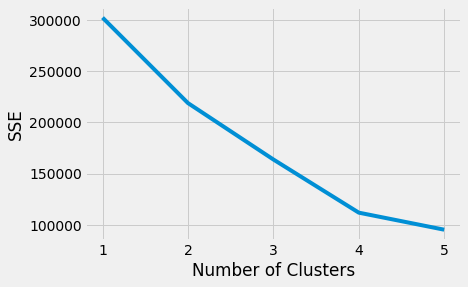

In [206]:
# Plot SSE

plt.plot(range(1, 6), sse)
plt.xticks(range(1, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [207]:
# Determine Silhoutte Score
silhouette_coefficients = []

for k in range(2, 6):
    model = KMeans(n_clusters=k, )
    model.fit(x_std)
    score = silhouette_score(x_std, model.labels_)
    silhouette_coefficients.append(score)
    

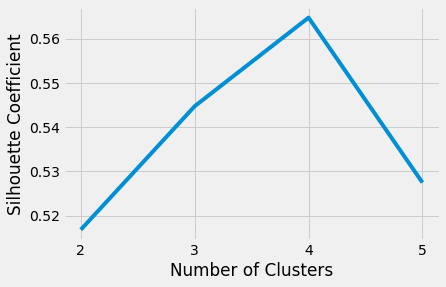

In [208]:
# Plot Silhoutte Coefficient

plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [213]:
# Perform KMeans with optimal number of clusters - 4

cluster=KMeans(n_clusters=4, random_state=0)
model=cluster.fit(x_std)
print("The sse value is:", model.inertia_)
print("\nThe final locations of centroid:", model.cluster_centers_)
print("\nThe number of iterations required to converge:", model.n_iter_)

The sse value is: 112046.25768640323

The final locations of centroid: [[-1.63186102 -0.02102995 -0.10524441]
 [ 0.49593736 -0.14932936 -0.12619713]
 [ 0.04602353 -0.22971389  4.55783334]
 [-0.36013069  4.54593895 -0.21660821]]

The number of iterations required to converge: 11


In [216]:
features_2['K_Means']=model.labels_
features_2['Segment'] = features_2['K_Means'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth'})
features_2.head(100)

,review_score,order_count,Total_Price,K_Means,Segment
0,4,1,146.87,1,second
1,1,2,137.89,0,first
3,3,1,140.61,0,first
4,4,1,137.58,1,second
5,4,1,142.05,1,second
...,...,...,...,...,...
119,5,1,159.09,1,second
120,4,1,192.05,1,second
121,4,1,176.15,1,second
122,4,1,184.50,1,second


In [215]:
# Export dataset
features_2.to_csv('Customer segment.csv')

In [210]:
# Perform PCA and fit the scaled data 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
als_pca=pca.fit_transform(x_std)

In [211]:
# Store the PCA components into a dataframe and classify the segments

pca_als_df=pd.DataFrame(data = als_pca
             , columns = ['principal_component_1', 'principal_component_2'])
pca_als_df['K_Means_PCA'] = model.labels_
pca_als_df['Segment'] = pca_als_df['K_Means_PCA'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth'})
pca_als_df.tail()

,principal_component_1,principal_component_2,K_Means_PCA,Segment
100750,0.294440,0.309267,0,first
100751,-0.015916,-0.459710,1,second
100752,-0.458738,0.750093,1,second
100753,-0.571870,-0.557706,1,second
100754,1.079370,1.398572,0,first


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


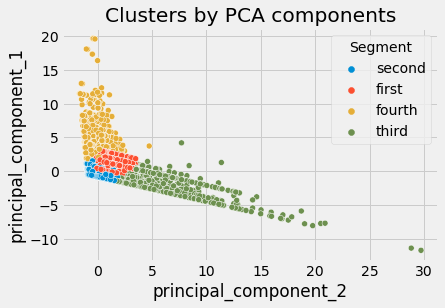

In [212]:
# Plot PCA components -
sns.scatterplot(pca_als_df.principal_component_2,pca_als_df.principal_component_1, 
                hue =pca_als_df['Segment'])
plt.title('Clusters by PCA components')
plt.show()

                                RFM MODELING

In [88]:
# Obtain the information for olist dataframe

olist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112372 entries, 0 to 112371
Data columns (total 14 columns):
customer_id                 112372 non-null object
customer_unique_id          112372 non-null object
order_id                    112372 non-null object
product_id                  112372 non-null object
review_id                   112372 non-null object
order_purchase_timestamp    112372 non-null object
customer_city               112372 non-null object
customer_state              112372 non-null object
product_category_name       110774 non-null object
review_score                112372 non-null int64
order_item_id               112372 non-null int64
review_creation_date        112372 non-null object
price                       112372 non-null float64
freight_value               112372 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 12.9+ MB


In [89]:
# Determine Monetary Value purchased by every customer

olist_df_rfm = olist_df

m = olist_df_rfm.groupby('customer_unique_id')['price'].sum()
m = pd.DataFrame(m).reset_index()
m.head()

,customer_unique_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [178]:
# Determine Frequency of purchase by every customer


f = olist_df[['order_id']].groupby(olist_df['customer_unique_id']).agg({'order_id':'count'})                                    
f = num_of_orders.rename(columns = {'order_id': 'frequency'})
f = num_of_orders.reset_index()
f.head()

,index,customer_unique_id,order_count
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,2,0000f46a3911fa3c0805444483337064,1
3,3,0000f6ccb0745a6a4b88665a16c9f078,1
4,4,0004aac84e0df4da2b147fca70cf8255,1


In [93]:
# Determine Recency of purchase by every customer

olist_df_rfm['Date']= pd.to_datetime(olist_df_rfm['order_purchase_timestamp'])
olist_df_rfm['rank'] = olist_df_rfm.sort_values(['customer_unique_id','Date']).groupby(['customer_unique_id'])['Date'].rank(method='min').astype(int)
olist_df_rfm.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,customer_id,customer_unique_id,order_id,product_id,review_id,order_purchase_timestamp,customer_city,customer_state,product_category_name,review_score,order_item_id,review_creation_date,price,freight_value,Date,rank
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,88b8b52d46df026a9d1ad2136a59b30b,2017-05-16 15:05:35,franca,SP,moveis_escritorio,4,1,2017-05-26 00:00:00,124.99,21.88,2017-05-16 15:05:35,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,7fc63200f12eebb5f387856afdd63db8,2017-11-09 00:50:13,santarem,PA,moveis_escritorio,1,1,2017-11-29 00:00:00,112.99,24.90,2017-11-09 00:50:13,1
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,7fc63200f12eebb5f387856afdd63db8,2017-11-09 00:50:13,santarem,PA,moveis_escritorio,1,2,2017-11-29 00:00:00,112.99,24.90,2017-11-09 00:50:13,1
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,251191809e37c1cffc16865947c18a4d,2017-05-07 20:11:26,nova santa rita,RS,moveis_escritorio,3,1,2017-05-27 00:00:00,124.99,15.62,2017-05-07 20:11:26,1
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,f7123bac5b91a0e2e38d8b41fd1206f4,2018-02-03 19:45:40,mage,RJ,moveis_escritorio,4,1,2018-03-01 00:00:00,106.99,30.59,2018-02-03 19:45:40,1


In [156]:
#Determine the most recent date from the dataset

recent = olist_df_rfm[olist_df_rfm['rank']==1]
olist_df_rfm.Date.max()

Timestamp('2018-09-03 09:06:57')

In [157]:
# Determine recency of purchase of every customer

recent['recency'] = pd.to_datetime('2018-09-03 09:06:57')-recent['Date']
recent.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,customer_unique_id,order_id,product_id,review_id,order_purchase_timestamp,customer_city,customer_state,product_category_name,review_score,order_item_id,review_creation_date,price,freight_value,Date,rank,recency
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,a9516a079e37a9c9c36b9b78b10169e8,88b8b52d46df026a9d1ad2136a59b30b,2017-05-16 15:05:35,franca,SP,moveis_escritorio,4,1,2017-05-26 00:00:00,124.99,21.88,2017-05-16 15:05:35,1,474 days 18:01:22
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,7fc63200f12eebb5f387856afdd63db8,2017-11-09 00:50:13,santarem,PA,moveis_escritorio,1,1,2017-11-29 00:00:00,112.99,24.90,2017-11-09 00:50:13,1,298 days 08:16:44
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,a9516a079e37a9c9c36b9b78b10169e8,7fc63200f12eebb5f387856afdd63db8,2017-11-09 00:50:13,santarem,PA,moveis_escritorio,1,2,2017-11-29 00:00:00,112.99,24.90,2017-11-09 00:50:13,1,298 days 08:16:44
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,a9516a079e37a9c9c36b9b78b10169e8,251191809e37c1cffc16865947c18a4d,2017-05-07 20:11:26,nova santa rita,RS,moveis_escritorio,3,1,2017-05-27 00:00:00,124.99,15.62,2017-05-07 20:11:26,1,483 days 12:55:31
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,a9516a079e37a9c9c36b9b78b10169e8,f7123bac5b91a0e2e38d8b41fd1206f4,2018-02-03 19:45:40,mage,RJ,moveis_escritorio,4,1,2018-03-01 00:00:00,106.99,30.59,2018-02-03 19:45:40,1,211 days 13:21:17


In [174]:
# Extract date value of recency

def recency(recency):
    res = str(recency).split(' ')[0]
    return(int(res))
    
recent['recency'] = recent['recency'].apply(recency)
recent.head()

,customer_unique_id,recency
0,861eff4711a542e4b93843c6dd7febb0,474
1,9eae34bbd3a474ec5d07949ca7de67c0,298
3,3c799d181c34d51f6d44bbbc563024db,483
4,23397e992b09769faf5e66f9e171a241,211
5,567ab47ca4deb92d46dbf54dce07d0a7,528


In [175]:
# Remove any data duplicates
recent = recent[['customer_unique_id','recency']]
recent = recent.drop_duplicates()

In [182]:
# Create the final dataframe

finaldf = f.merge(m,on='customer_unique_id').merge(recent,on='customer_unique_id')
finaldf= finaldf.rename(columns={'order_count': 'frequency', 'price': 'monetary'})
finaldf.head()

,index,customer_unique_id,frequency,monetary,recency
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118
2,2,0000f46a3911fa3c0805444483337064,1,69.00,541
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325
4,4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292


Text(0, 0.5, 'Frequency')

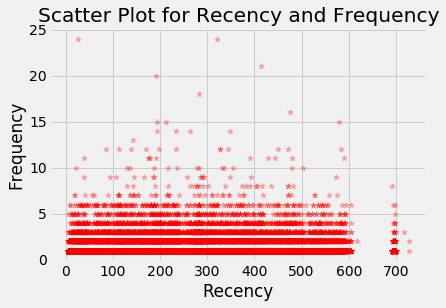

In [183]:
# Plot Recency Vs frequency

plt.scatter( finaldf.recency,finaldf.frequency,
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Recency and Frequency') 
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

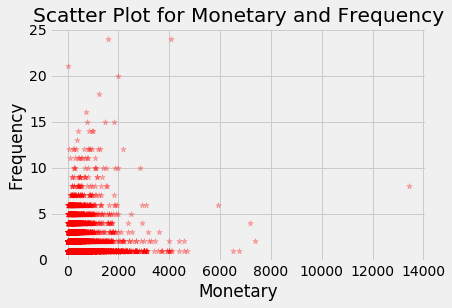

In [184]:
#Frequency Vs Monetary

plt.scatter(finaldf.monetary, finaldf.frequency,
            color = 'red',
            marker = '*', alpha = 0.3)

plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

In [162]:
finaldf.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118
2,0000f46a3911fa3c0805444483337064,1,69.00,541
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292


In [189]:
#Bucketing Recency:

def R_Score(x):
    if x['recency']>90 and x['recency'] <=180:
        R = 2
    elif x['recency']<=90:
        R = 3
    else:
        R=1
    return R

finaldf['R'] = finaldf.apply(R_Score,axis=1)

In [186]:
#Bucketing Frequency:

def F_Score(x):
    if x['frequency']>2:
        F = 2
    else:
        F = 1
    return F

finaldf['F'] = finaldf.apply(F_Score,axis=1)

In [187]:
# Bucketing Monetary value

M_Score = pd.qcut(finaldf['monetary'],q=3,labels=range(1,4))
finaldf = finaldf.assign(M = M_Score.values)

In [190]:
finaldf.head()

,index,customer_unique_id,frequency,monetary,recency,F,M,R
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115,1,3,2
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118,1,1,2
2,2,0000f46a3911fa3c0805444483337064,1,69.00,541,1,2,1
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325,1,1,1
4,4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292,1,3,1


In [191]:
# Calculate RFM Score by concatenating R, F, M values

def RFM_Score(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
finaldf['RFM_Score'] = finaldf.apply(RFM_Score,axis=1)

In [192]:
# Obtain unique values of RFM score

finaldf.head()
finaldf.RFM_Score.unique()

array(['213', '211', '112', '111', '113', '212', '312', '311', '323',
       '313', '123', '223', '222', '221', '321', '121', '122', '322'],
      dtype=object)

In [195]:
# Segment the customers based on RFM Score

def segment_calc(RFM):
    if RFM['RFM_Score'] in ('313','311','312'):
        s='New'
    elif RFM['RFM_Score'] in ('323','321','322'):
        s='Regular'
    elif RFM['RFM_Score'] in ('212', '213','211', '221', '222'):
        s='Churning'
    else:
        s='Lost'
    return s

finaldf['customer_segment'] = finaldf.apply(segment_calc,axis=1)
finaldf.head()

,index,customer_unique_id,frequency,monetary,recency,F,M,R,RFM_Score,segment,customer_segment
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,115,1,3,2,213,Churning customers,Churning
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,118,1,1,2,211,Churning customers,Churning
2,2,0000f46a3911fa3c0805444483337064,1,69.00,541,1,2,1,112,Lost customers,Lost
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,325,1,1,1,111,Lost customers,Lost
4,4,0004aac84e0df4da2b147fca70cf8255,1,180.00,292,1,3,1,113,Lost customers,Lost


Text(0.5, 1.0, 'Number of customers by segment')

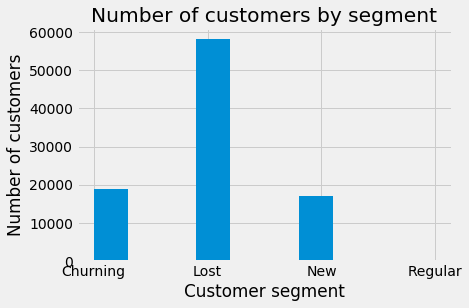

In [196]:
# Plot the customer segments

plt.hist(finaldf.customer_segment)
plt.xlabel('Customer segment')
plt.ylabel('Number of customers')
plt.title('Number of customers by segment')